# Инициализация

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib widget

In [2]:
videofiles = [
    "../video_data/Pexels Videos 1572378.mp4",
    "../video_data/pexels-nino-milin-7044284.mp4",
    "../video_data/pexels-taryn-elliott-8354620.mp4",
    "../video_data/video.mp4",
]

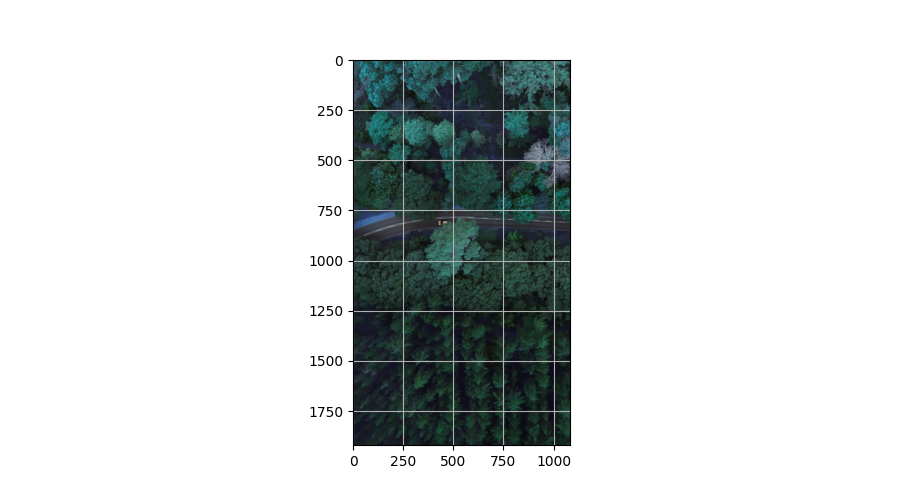

In [57]:
cap = cv2.VideoCapture(videofiles[2])
ret, frame = cap.read()
frame_gray1 = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
frame_gray2 = frame_gray1
mask = np.zeros_like(frame)
mask[..., 1] = 255
plt.figure(figsize=(9, 5))
plt.imshow(frame)
plt.grid()

# Главный цикл обработки

In [ ]:
ret, frame = cap.read()
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
frame_gray1 = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
if frame_gray2 is None:
    frame_gray2 = frame_gray1
dense_flow = cv2.calcOpticalFlowFarneback(frame_gray2, frame_gray1,
                                         None,
                                         0.5, # pyramids scale
                                         3, # levels number of pyramid layers
                                         15, # averaging window size
                                         3, # number of iterations
                                         5, # size of the pixel neighborhood
                                         1.2, # standard deviation
                                         0) #

magnitude, angle = cv2.cartToPolar(dense_flow[..., 0], dense_flow[..., 1])
# Sets image hue according to the optical flow direction
mask[..., 0] = angle * 180 / np.pi / 2
# Sets image value according to the optical flow magnitude (normalized)
mask[..., 2] = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)
# Converts HSV to RGB (BGR) color representation


# https://stackoverflow.com/questions/43111029/how-to-find-the-average-colour-of-an-image-in-python-with-opencv
# выделение среднего направления
pixels = np.float32(rgb.reshape(-1, 3))
n_colors = 5
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 200, .1)
flags = cv2.KMEANS_RANDOM_CENTERS
_, labels, palette = cv2.kmeans(pixels, n_colors, None, criteria, 10, flags)
_, counts = np.unique(labels, return_counts=True)
dominant = palette[np.argmax(counts)]
print(dominant)
print(counts)

# маска подстилающей поверхности
backbround_mask = np.zeros_like(rgb)
print(backbround_mask.shape)
backbround_mask[..., 0] = dominant[0]
backbround_mask[...,1] = dominant[1]
backbround_mask[...,2] = dominant[2]
print(backbround_mask.shape)

# вычитание маски подстилающей поверхности
backbround_mask = np.abs(rgb.astype(float) - backbround_mask)
backbround_mask = backbround_mask[...,0]+backbround_mask[...,1]+backbround_mask[...,2]
backbround_mask = backbround_mask > 200 # TODO в перспектике данный параметр подбирать
print(backbround_mask.shape)
backbround_mask = backbround_mask.astype(np.uint8)

rgb = cv2.cvtColor(mask, cv2.COLOR_HSV2BGR)

# Opens a new window and displays the output frame
contours = cv2.findContours(backbround_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]
frame_with_contours = frame.copy()
for i in contours:
    x,y,w,h = cv2.boundingRect(i)
    cv2.rectangle(frame_with_contours, (x, y), (x + w, y + h), (255,0,0), 4)
    
plt.figure(figsize=(12, 5))
ax1 = plt.subplot(1, 2, 1)
plt.imshow(backbround_mask)
plt.grid()

# plt.figure(figsize=(9, 5))
ax1 = plt.subplot(1, 2, 2)
plt.imshow(frame_with_contours)
plt.grid()

frame_gray2 = frame_gray1

In [ ]:
cap.release()